In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
gcamp7_lib = pd.read_csv('./gcamp7_lib.csv', index_col = 0)
gcamp6_lib = pd.read_csv('./GCaMP6_lib.csv', index_col = 0)

In [3]:
# Generate dataframe of type of mutation by residue number
AA1idx = [
    'A',
    'V',
    'L',
    'I',
    'M',
    'F',
    'Y',
    'W',
    'S',
    'T',
    'N',
    'Q',
    'C',
    'D',
    'E',
    'H',
    'K',
    'R',
    'G',
    'P',
    '*'
]

gcamp3_seq = 'MGSHHHHHHGMASMTGGQQMGRDLYDDDDKDLATMVDSSRRKWNKTGHAVRAIGRLSSLENVYIKADKQKNGIKANFKIRHNIEDGGVQLAYHYQQNTPIGDGPVLLPDNHYLSVQSKLSKDPNEKRDHMVLLEFVTAAGITLGMDELYKGGTGGSMVSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFICTTGKLPVPWPTLVTTLTYGVQCFSRYPDHMKQHDFFKSAMPEGYIQERTIFFKDDGNYKTRAEVKFEGDTLVNRIELKGIDFKEDGNILGHKLEYNTRDQLTEEQIAEFKEAFSLFDKDGDGTITTKELGTVMRSLGQNPTEAELQDMINEVDADGDGTIDFPEFLTMMARKMKDTDSEEEIREAFRVFDKDGNGYISAAELRHVMTNLGEKLTDEEVDEMIREADIDGDGQVNYEEFVQMMTAK*'
gcamp6s_seq = 'MGSHHHHHHGMASMTGGQQMGRDLYDDDDKDLATMVDSSRRKWNKTGHAVRAIGRLSSLENVYIKADKQKNGIKANFKHRHNIEDGGVQLAYHYQQNTPIGDGPVLLPDNHYLSVQSKLSKDPNEKRDHMVLLEFVTAAGITLGMDELYKGGTGGSMVSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFICTTGKLPVPWPTLVTTLTYGVQCFSRYPDHMKQHDFFKSAMPEGYIQERTIFFKDDGNYKTRAEVKFEGDTLVNRIELKGIDFKEDGNILGHKLEYNTLPQLTEEQIAEFKEAFSLFDKDGDGTITTKELGTVMRSLGQNPTEAELQDMINEVDADGDGTIDFPEFLTMMARKMKDYRSTEEIREAFRGFDKDGNGYISAAELRHVMTNLGEKLTDEEVDEMIREADIDGDGQVNYEEFVQMMTAK*'
# index = sequence number - 1
"""
Used to get GCaMP6s sequence

gcamp6s_seq = list(gcamp3_seq)
for mut in gcamp6_lib.loc['GCaMP6s', 'Mutations added to GCaMP3'].split(' '):
    idx = int(mut[1:-1])
    gcamp6s_seq[idx] = mut[-1]
gcamp6s_seq = ''.join(gcamp6s_seq)
"""


"\nUsed to get GCaMP6s sequence\n\ngcamp6s_seq = list(gcamp3_seq)\nfor mut in gcamp6_lib.loc['GCaMP6s', 'Mutations added to GCaMP3'].split(' '):\n    idx = int(mut[1:-1])\n    gcamp6s_seq[idx] = mut[-1]\ngcamp6s_seq = ''.join(gcamp6s_seq)\n"

In [4]:
# Get point mutants from GCaMP7 data
pointMuts = []
for mut in gcamp7_lib.index.tolist():
    if mut != 'GCaMP6s':
        mutations = gcamp7_lib.loc[mut, 'Mutations added to GCaMP6s'].split(' ')
        if len(mutations) == 1:
            pointMuts.append(mut)
pointMuts = gcamp7_lib.loc[pointMuts]

# There are insertions in this dataset, first check in this dataframe, and then check the rest of the dataset
insertions = []
for mut in pointMuts.index.tolist():
    mutation = gcamp7_lib.loc[mut, 'Mutations added to GCaMP6s']
    if 'ins' in mutation:
        insertions.append(mut)
pointMuts.drop(insertions, axis = 0, inplace = True) # There was only one insertion here, so 79 point mutants total

# Check for insertions in whole GCaMP7 library
insertions = []
for mut in gcamp7_lib.index.tolist():
    if mut != 'GCaMP6s':
        mutation = gcamp7_lib.loc[mut, 'Mutations added to GCaMP6s']
        if 'ins' in mutation:
            insertions.append(mut)
# The only insertion is 10.1082, I'm going to drop this one since I don't know how to deal with this point and there's only one
gcamp7_lib.drop(insertions, axis = 0, inplace = True)
#gcamp7_lib.to_csv('./gcamp7_lib.csv')
# I updated the master gcamp7_lib.csv to not include this insertion

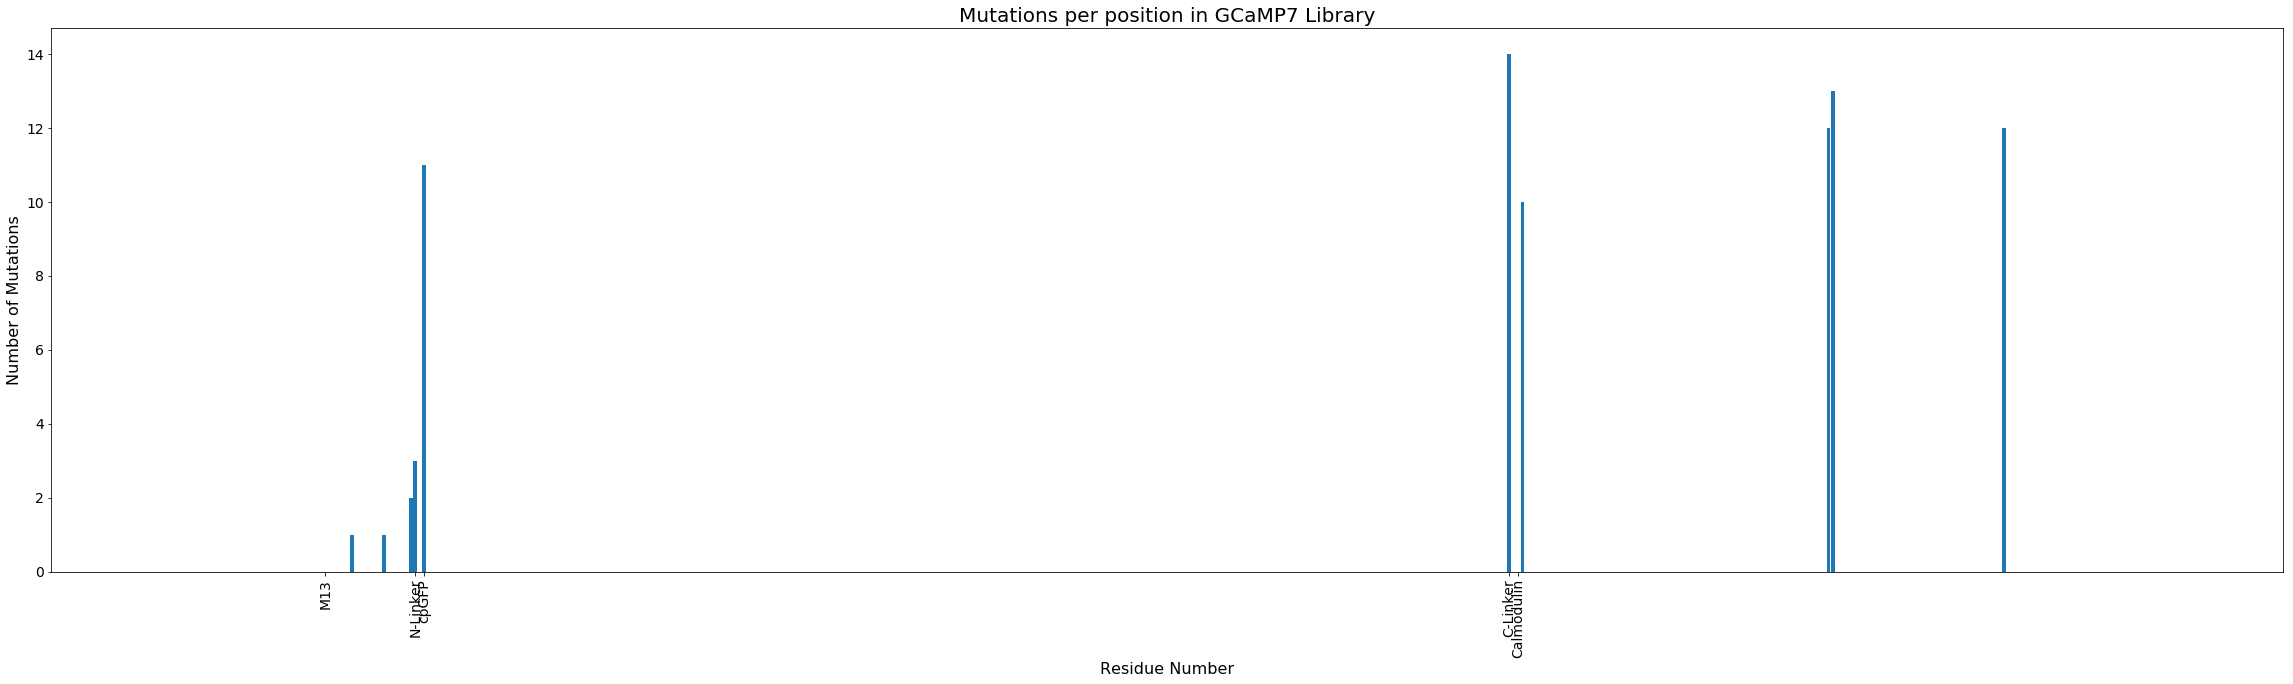

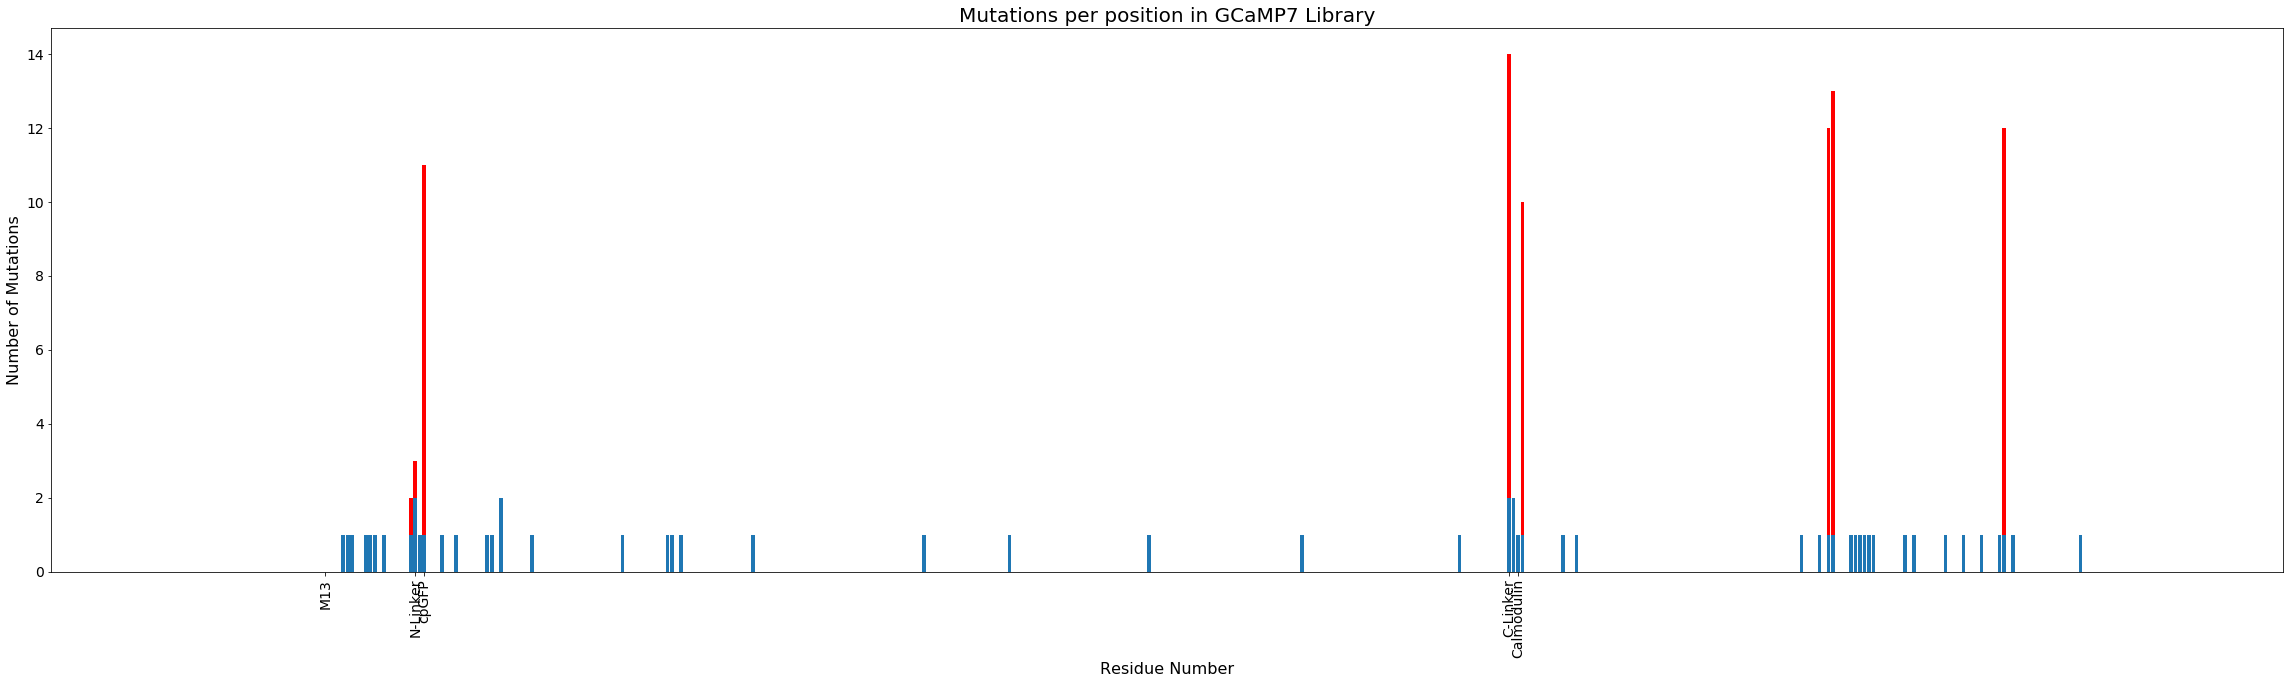

In [12]:
AA1idx = [
    'A',
    'V',
    'L',
    'I',
    'M',
    'F',
    'Y',
    'W',
    'S',
    'T',
    'N',
    'Q',
    'C',
    'D',
    'E',
    'H',
    'K',
    'R',
    'G',
    'P',
    '*'
]
pmMap = pd.DataFrame(index = AA1idx, columns = range(1, len(gcamp3_seq) + 1))
for var in pointMuts.index.tolist():
    muts = pointMuts.loc[var, 'Mutations added to GCaMP6s']
    resn = int(muts[1:-1])
    mut = muts[-1]
    pmMap.loc[mut, resn] = 1
    
plt.figure(figsize = [40, 10])
plt.bar(x = range(1, len(gcamp3_seq) + 1), height = pmMap.fillna(0.0).sum(axis = 0))
plt.xticks(np.array([39, 59, 61, 302, 304]), ('M13', 'N-Linker', 'cpGFP', 'C-Linker', 'Calmodulin'), rotation = 'vertical')
plt.tick_params(labelsize = 14)
plt.xlabel('Residue Number', fontsize = 16)
plt.ylabel('Number of Mutations', fontsize = 16)
plt.title('Mutations per position in GCaMP7 Library', fontsize = 20)
plt.show()

    
fullMap = pd.DataFrame(index = AA1idx, columns = range(1, len(gcamp3_seq) + 1))
for var in gcamp7_lib.index.tolist():
    if var != 'GCaMP6s':
        muts = gcamp7_lib.loc[var, 'Mutations added to GCaMP6s'].split(' ')
        for mut in muts:
            resn = int(mut[1:-1])
            res = mut[:-1]
            fullMap.loc[res, resn] = 1  

plt.figure(figsize = [40, 10])
plt.bar(x = range(1, len(gcamp3_seq) + 1), height = pmMap.fillna(0.0).sum(axis = 0), color = 'r')
plt.bar(x = range(1, len(gcamp3_seq) + 1), height = fullMap.fillna(0.0).sum(axis = 0))
plt.xticks(np.array([39, 59, 61, 302, 304]), ('M13', 'N-Linker', 'cpGFP', 'C-Linker', 'Calmodulin'), rotation = 'vertical')
plt.tick_params(labelsize = 14)
plt.xlabel('Residue Number', fontsize = 16)
plt.ylabel('Number of Mutations', fontsize = 16)
plt.title('Mutations per position in GCaMP7 Library', fontsize = 20)
plt.show()



In [22]:
# Make the same kind of plot for GCaMP6 dataset
# Save original pointMuts and fullMap DF to new variables
pointMuts7 = pointMuts.copy()
fullMap7 = fullMap.copy()

pointMuts6 = []
for mut in gcamp6_lib.index.tolist()[2:]:
    mutations = gcamp6_lib.loc[mut, 'Mutations added to GCaMP3'].split(' ')
    if len(mutations) == 1:
        pointMuts6.append(mut)
pointMuts6 = gcamp6_lib.loc[pointMuts6]


fullMap6 = pd.DataFrame(index = AA1idx, columns = range(1, len(gcamp3_seq) + 1))
for var in gcamp6_lib.index.tolist()[2:]:
    muts = gcamp6_lib.loc[var, 'Mutations added to GCaMP3'].split(' ')
    for mut in muts:
        resn = int(mut[1:-1])
        res = mut[:-1]
        fullMap6.loc[res, resn] = 1

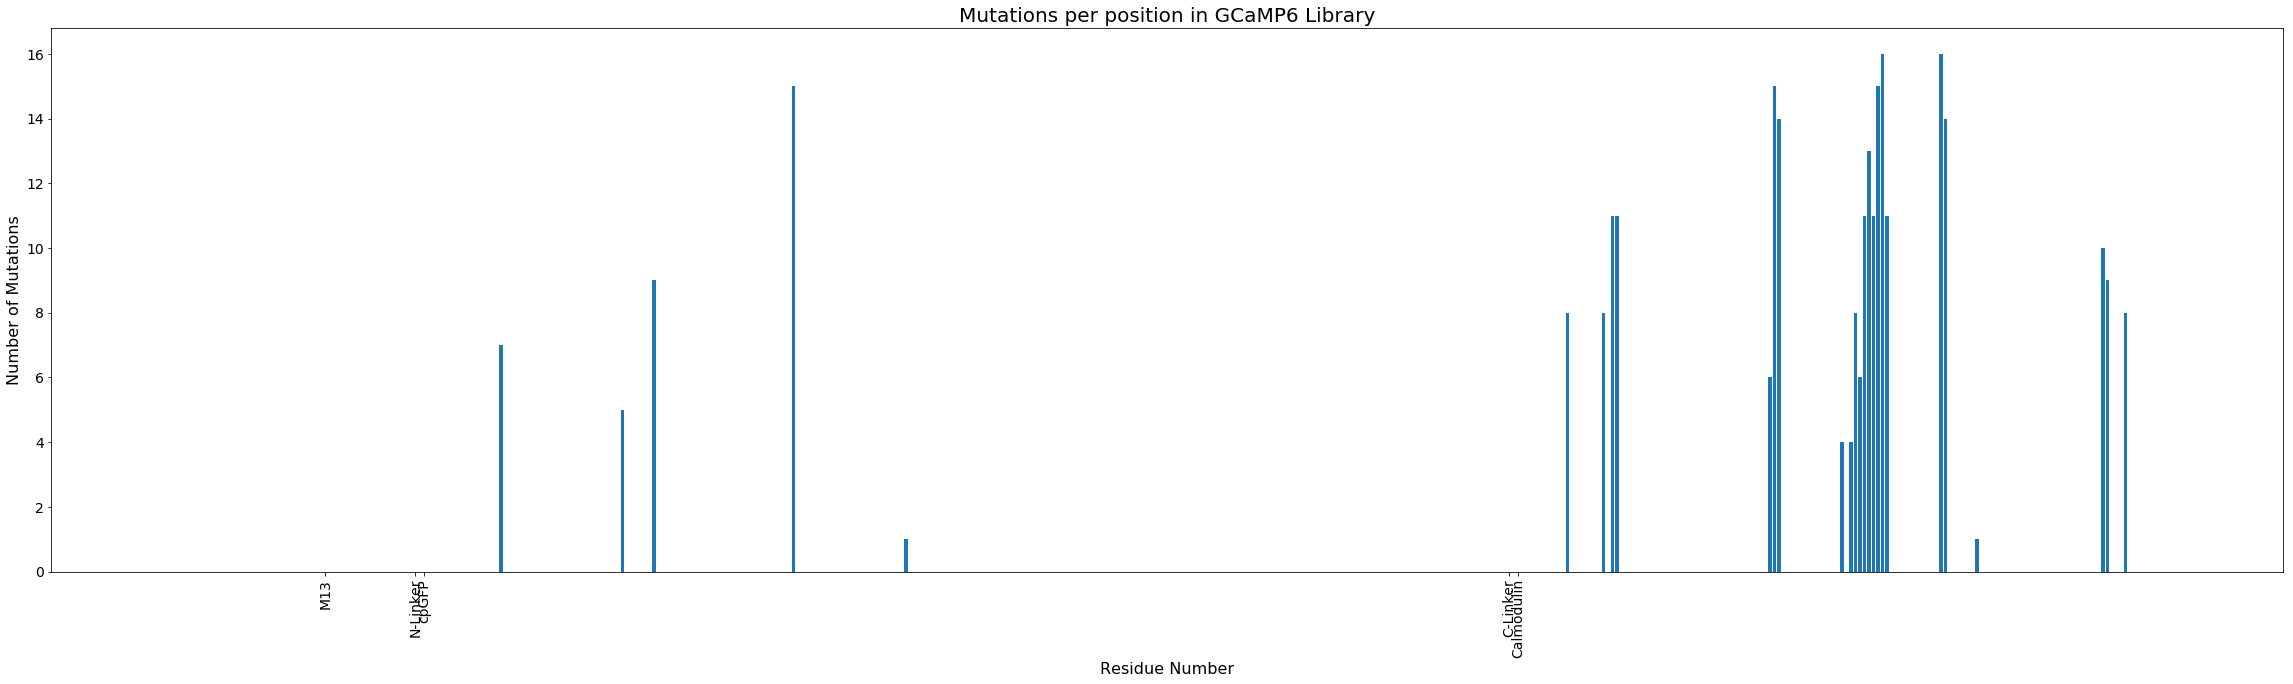

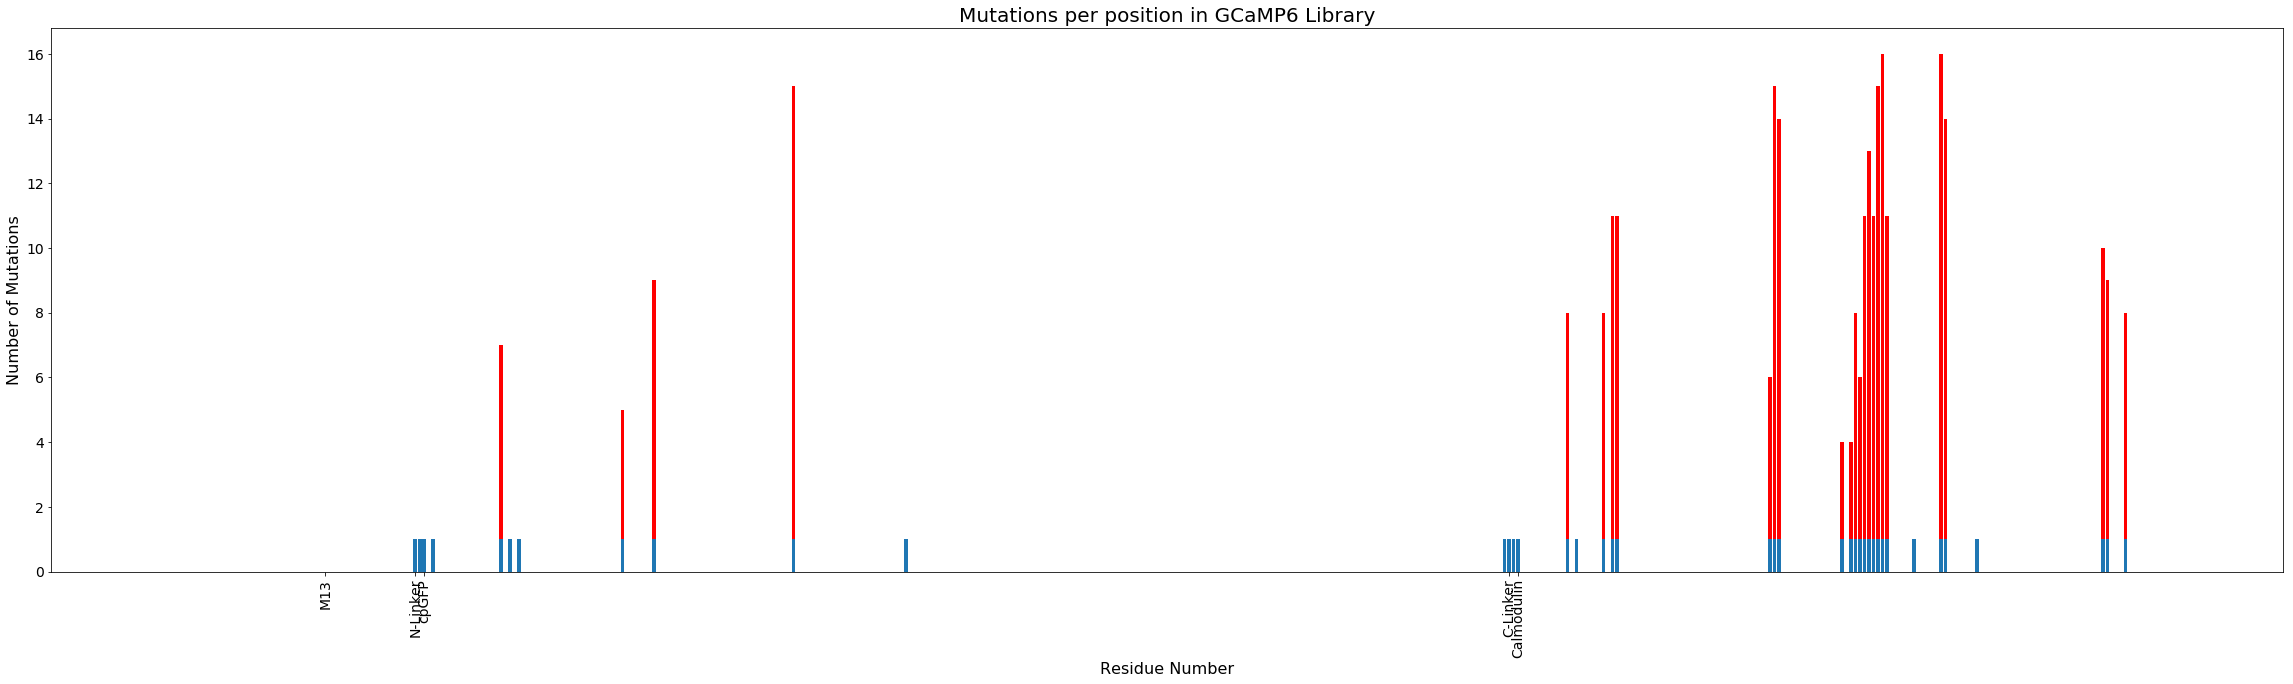

In [32]:
pmMap7 = pmMap.copy()

pmMap6 = pd.DataFrame(index = AA1idx, columns = range(1, len(gcamp3_seq) + 1))
for var in pointMuts6.index.tolist():
    muts = pointMuts6.loc[var, 'Mutations added to GCaMP3']
    resn = int(muts[1:-1])
    mut = muts[-1]
    pmMap6.loc[mut, resn] = 1

plt.figure(figsize = [40, 10])
plt.bar(x = range(1, len(gcamp3_seq) + 1), height = pmMap6.fillna(0.0).sum(axis = 0))
plt.xticks(np.array([39, 59, 61, 302, 304]), ('M13', 'N-Linker', 'cpGFP', 'C-Linker', 'Calmodulin'), rotation = 'vertical')
plt.tick_params(labelsize = 14)
plt.xlabel('Residue Number', fontsize = 16)
plt.ylabel('Number of Mutations', fontsize = 16)
plt.title('Mutations per position in GCaMP6 Library', fontsize = 20)
plt.show()


plt.figure(figsize = [40, 10])
plt.bar(x = range(1, len(gcamp3_seq) + 1), height = pmMap6.fillna(0.0).sum(axis = 0), color = 'r')
plt.bar(x = range(1, len(gcamp3_seq) + 1), height = fullMap6.fillna(0.0).sum(axis = 0))
plt.xticks(np.array([39, 59, 61, 302, 304]), ('M13', 'N-Linker', 'cpGFP', 'C-Linker', 'Calmodulin'), rotation = 'vertical')
plt.tick_params(labelsize = 14)
plt.xlabel('Residue Number', fontsize = 16)
plt.ylabel('Number of Mutations', fontsize = 16)
plt.title('Mutations per position in GCaMP6 Library', fontsize = 20)
plt.show()

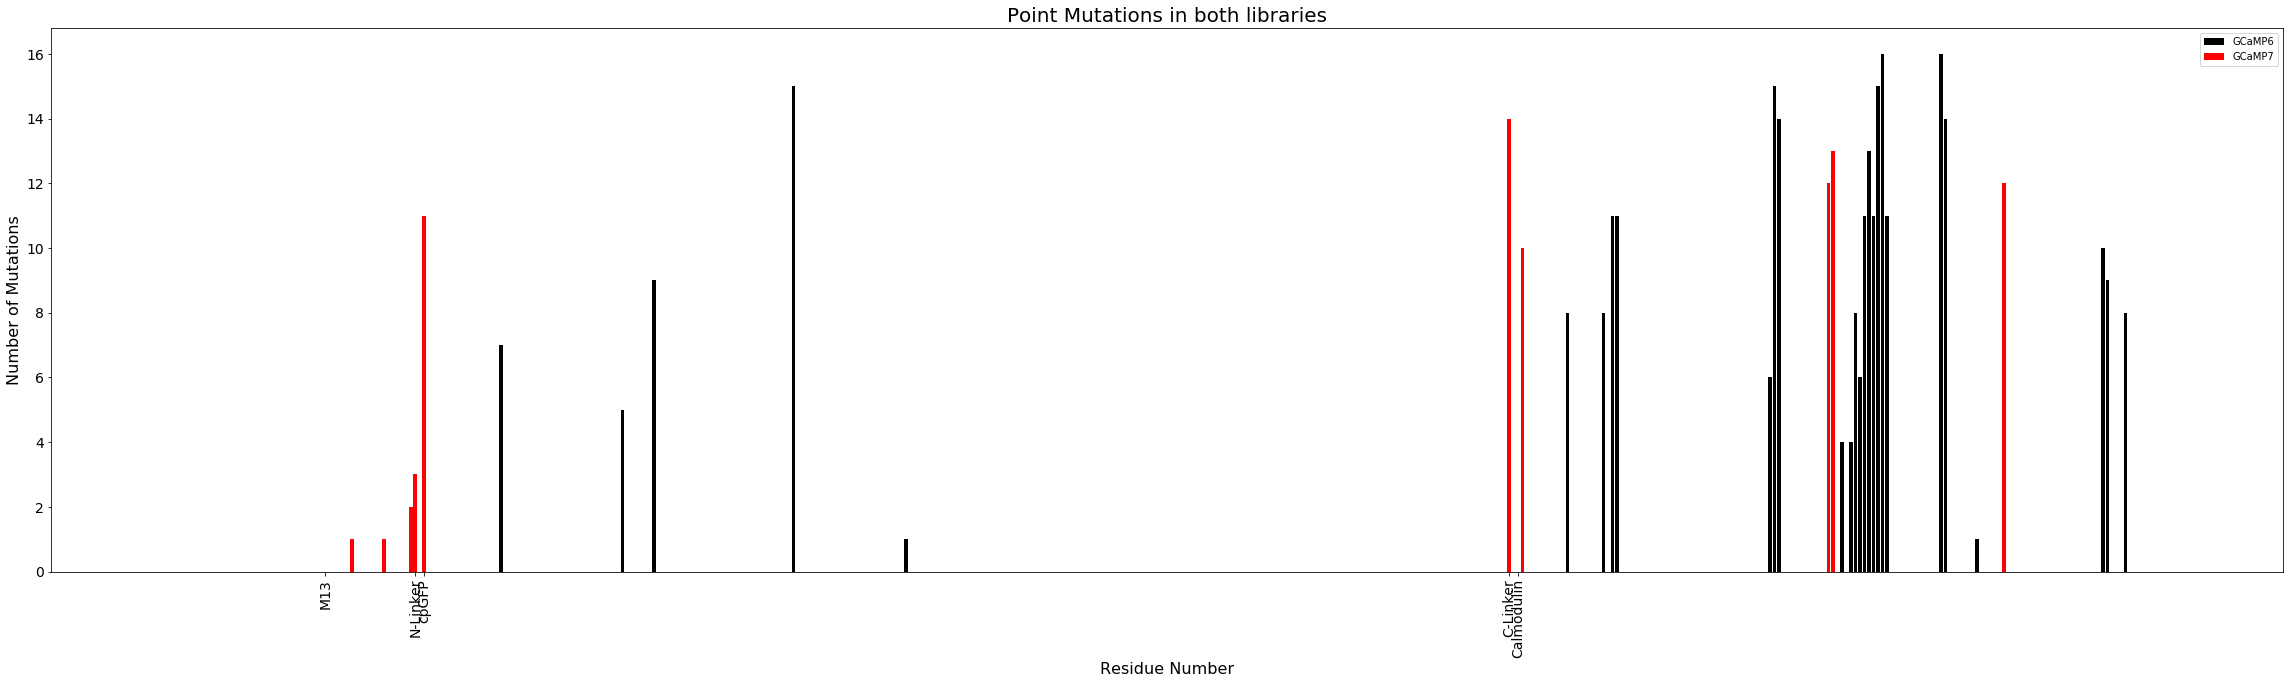

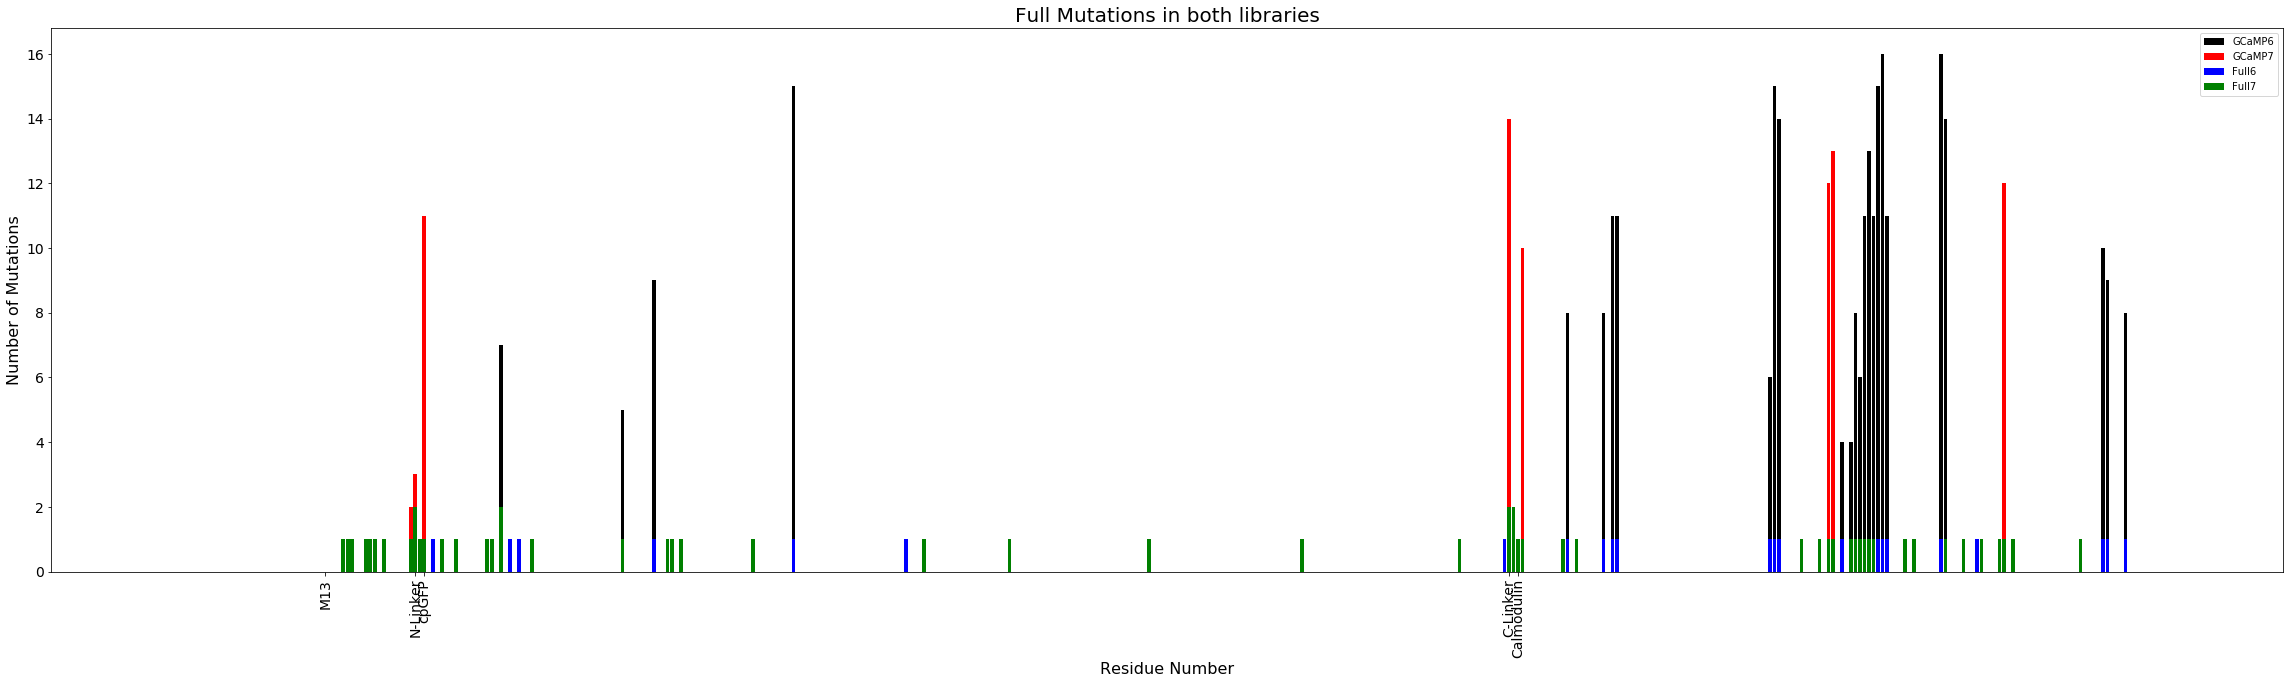

In [31]:
# Plot all mutations from both libraries on top of each other
plt.figure(figsize = [40, 10])
plt.bar(x = range(1, len(gcamp3_seq) + 1), height = pmMap6.fillna(0.0).sum(axis = 0), color = 'k')
plt.bar(x = range(1, len(gcamp3_seq) + 1), height = pmMap7.fillna(0.0).sum(axis = 0), color = 'r')
plt.xticks(np.array([39, 59, 61, 302, 304]), ('M13', 'N-Linker', 'cpGFP', 'C-Linker', 'Calmodulin'), rotation = 'vertical')
plt.tick_params(labelsize = 14)
plt.xlabel('Residue Number', fontsize = 16)
plt.ylabel('Number of Mutations', fontsize = 16)
plt.title('Point Mutations in both libraries', fontsize = 20)
plt.legend(['GCaMP6', 'GCaMP7'])
plt.show()

plt.figure(figsize = [40, 10])
plt.bar(x = range(1, len(gcamp3_seq) + 1), height = pmMap6.fillna(0.0).sum(axis = 0), color = 'k')
plt.bar(x = range(1, len(gcamp3_seq) + 1), height = pmMap7.fillna(0.0).sum(axis = 0), color = 'r')
plt.bar(x = range(1, len(gcamp3_seq) + 1), height = fullMap6.fillna(0.0).sum(axis = 0), color = 'b')
plt.bar(x = range(1, len(gcamp3_seq) + 1), height = fullMap7.fillna(0.0).sum(axis = 0), color = 'g')
plt.xticks(np.array([39, 59, 61, 302, 304]), ('M13', 'N-Linker', 'cpGFP', 'C-Linker', 'Calmodulin'), rotation = 'vertical')
plt.tick_params(labelsize = 14)
plt.xlabel('Residue Number', fontsize = 16)
plt.ylabel('Number of Mutations', fontsize = 16)
plt.title('Full Mutations in both libraries', fontsize = 20)
plt.legend(['GCaMP6', 'GCaMP7', 'Full6', 'Full7'])
plt.show()


In [33]:
z_scales = pd.read_csv('./Z-scales.csv', index_col = 0)
z_scales

,Z1,Z2,Z3
Amino Acid,,,
A,0.07,-1.73,0.09
V,-2.69,-2.53,-1.29
L,-4.19,-1.03,-0.98
I,-4.44,-1.68,-1.03
P,-1.22,0.88,2.23
F,-4.92,1.30,0.45
W,-4.75,3.65,0.85
M,-2.49,-0.27,-0.41
K,2.84,1.41,-3.14


In [39]:
# Make gcamp7 dataset for regression models
# Build matrix for a single sample
varArrDF = pd.DataFrame(index = gcamp7_lib.index.tolist(), columns = range(1350))

for variant in gcamp7_lib.index.tolist():
    if variant == 'GCaMP6s': 
        continue
        
    # Parse out mutations for this variant
    mutations = gcamp7_lib.loc[variant, 'Mutations added to GCaMP6s'].split(' ')
    varSeq = list(gcamp3_seq)

    # Mutate sequence accordingly
    for mutation in mutations:
        seqn = int(mutation[1:-1])
        varSeq[seqn - 1] = mutation[-1]

    # Make a DF with Z-scales according to each residue, and flatten into a 1D array
    varDF = pd.DataFrame(index = range(len(varSeq)), columns = ['Seq', 'Z1', 'Z2', 'Z3'])
    varDF['Seq'] = varSeq
    varDF = varDF[:-1]
    for pos in varDF.index:
        resID = varDF.loc[pos, 'Seq']
        varDF.loc[pos, ['Z1', 'Z2', 'Z3']] = z_scales.loc[resID]
    varArr = varDF[['Z1', 'Z2', 'Z3']].values.flatten()

    # Assign variant array to master DF
    varArrDF.loc[variant] = varArr

In [41]:
# Add GCaMP6s values to master
varSeq = list(gcamp6s_seq)
varDF = pd.DataFrame(index = range(len(varSeq)), columns = ['Seq', 'Z1', 'Z2', 'Z3'])
varDF['Seq'] = varSeq
varDF = varDF[:-1]
for pos in varDF.index:
    resID = varDF.loc[pos, 'Seq']
    varDF.loc[pos, ['Z1', 'Z2', 'Z3']] = z_scales.loc[resID]
varArr = varDF[['Z1', 'Z2', 'Z3']].values.flatten()
varArrDF.loc['GCaMP6s'] = varArr

In [43]:
varArrDF.to_csv('./varZScore3_gcamp7.csv')

In [44]:
# Drop positions that do not mutate
colsToDrop = varArrDF.nunique()[varArrDF.nunique() == 1].index
dat = varArrDF.drop(colsToDrop, axis = 1)
dat

,126,127,128,129,130,131,132,133,134,141,...,1232,1233,1234,1235,1239,1240,1241,1284,1285,1286
GCaMP3,-4.75,3.65,0.85,3.22,1.45,0.84,2.84,1.41,-3.14,2.41,...,-0.41,0.92,-2.09,-1.4,-4.19,-1.03,-0.98,3.08,0.39,-0.07
GCaMP5G,-4.75,3.65,0.85,3.22,1.45,0.84,2.84,1.41,-3.14,2.41,...,-0.41,0.92,-2.09,-1.4,-4.19,-1.03,-0.98,3.08,0.39,-0.07
GCaMP6s,-4.75,3.65,0.85,3.22,1.45,0.84,2.84,1.41,-3.14,2.41,...,-0.41,0.92,-2.09,-1.4,-4.19,-1.03,-0.98,3.08,0.39,-0.07
GCaMP6f,-4.75,3.65,0.85,3.22,1.45,0.84,2.84,1.41,-3.14,2.41,...,-0.41,0.92,-2.09,-1.4,-4.19,-1.03,-0.98,3.08,0.39,-0.07
10.699,-4.75,3.65,0.85,3.22,1.45,0.84,2.84,1.41,-3.14,2.41,...,-0.41,0.92,-2.09,-1.4,-4.19,-1.03,-0.98,3.08,0.39,-0.07
10.700,-4.75,3.65,0.85,3.22,1.45,0.84,2.84,1.41,-3.14,2.41,...,-0.41,0.92,-2.09,-1.4,-4.19,-1.03,-0.98,3.08,0.39,-0.07
10.701,-4.75,3.65,0.85,3.22,1.45,0.84,2.84,1.41,-3.14,2.41,...,-0.41,0.92,-2.09,-1.4,-4.19,-1.03,-0.98,3.08,0.39,-0.07
G-GECO1.0,-4.75,3.65,0.85,3.22,1.45,0.84,2.84,1.41,-3.14,2.41,...,-0.41,0.92,-2.09,-1.4,-4.19,-1.03,-0.98,-2.69,-2.53,-1.29
G-GECO1.1,-4.75,3.65,0.85,3.22,1.45,0.84,2.84,1.41,-3.14,2.41,...,-0.41,0.92,-2.09,-1.4,-4.19,-1.03,-0.98,-2.69,-2.53,-1.29
GEX-GECO1,-4.75,3.65,0.85,3.22,1.45,0.84,2.84,1.41,-3.14,2.41,...,-0.41,0.92,-2.09,-1.4,-4.19,-1.03,-0.98,-2.69,-2.53,-1.29


In [55]:
x = dat
y = gcamp7_lib['160 AP _F/F0']

In [69]:
# Choose different CV method (ridge regressor, SVR, random forest)
from sklearn.model_selection import ShuffleSplit
splits = 10
ss = ShuffleSplit(n_splits = splits, test_size = 0.2)
ss.get_n_splits(x)

from sklearn.linear_model import LinearRegression #0
from sklearn.linear_model import SGDRegressor     #1
from sklearn.linear_model import Lasso            #2
from sklearn.linear_model import ElasticNet       #3
from sklearn.linear_model import Ridge            #4
from sklearn.svm import SVR                       #5
from sklearn.ensemble import RandomForestRegressor#6
from sklearn.ensemble import AdaBoostRegressor    #7
from sklearn.ensemble import GradientBoostingRegressor #8

#ss = ShuffleSplit(n_splits = 100, test_size = 0.2)
#ss.get_n_splits(x)


scores = [0] * 9

models = [
    LinearRegression(),
    SGDRegressor(),
    Lasso(),
    ElasticNet(),
    Ridge(),
    SVR(),
    RandomForestRegressor(),
    AdaBoostRegressor(),
    GradientBoostingRegressor()
]


In [80]:
i = 0
for mdl in models:
    for train_index, test_index in ss.split(x):
        x_train = x.iloc[train_index]
        y_train = y.iloc[train_index]
        x_test = x.iloc[test_index]
        y_test = y.iloc[test_index]
        #mdl = models[i]
        mdl.fit(x_train, y_train)
        y_pred = mdl.predict(x_test)
        scores[i] = scores[i] + mdl.score(x_test, y_test)
    i += 1

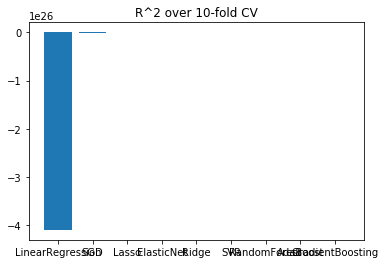

In [84]:
scores = [score * 1.0 / 1.0 * splits for score in scores]
plt.bar(range(1, 10), scores)
plt.xticks(range(1, 10), ['LinearRegression', 'SGD', 'Lasso', 'ElasticNet', 'Ridge', 'SVR', 'RandomForest', 'AdaBoost', 'GradientBoosting'])
plt.title('R^2 over 10-fold CV')
plt.show()

In [85]:
ridgeScores = []
svrScores = []
rfScores = []
adaScores = []
gradScores = []

splits = 100
ss = ShuffleSplit(n_splits = splits, test_size = 0.2)
ss.get_n_splits(x)

for train_index, test_index in ss.split(x):
    x_train = x.iloc[train_index]
    y_train = y.iloc[train_index]
    x_test = x.iloc[test_index]
    y_test = y.iloc[test_index]
    mdl = Ridge()
    mdl.fit(x_train, y_train)
    y_pred = mdl.predict(x_test)
    ridgeScores.append(mdl.score(x_test, y_test))
    
for train_index, test_index in ss.split(x):
    x_train = x.iloc[train_index]
    y_train = y.iloc[train_index]
    x_test = x.iloc[test_index]
    y_test = y.iloc[test_index]
    mdl = sklearn.svm.SVR()
    mdl.fit(x_train, y_train)
    y_pred = mdl.predict(x_test)
    svrScores.append(mdl.score(x_test, y_test))
    
    
for train_index, test_index in ss.split(x):
    x_train = x.iloc[train_index]
    y_train = y.iloc[train_index]
    x_test = x.iloc[test_index]
    y_test = y.iloc[test_index]
    mdl = RandomForestRegressor()
    mdl.fit(x_train, y_train)
    y_pred = mdl.predict(x_test)
    rfScores.append(mdl.score(x_test, y_test))

for train_index, test_index in ss.split(x):
    x_train = x.iloc[train_index]
    y_train = y.iloc[train_index]
    x_test = x.iloc[test_index]
    y_test = y.iloc[test_index]
    mdl = sklearn.ensemble.AdaBoostRegressor()
    mdl.fit(x_train, y_train)
    y_pred = mdl.predict(x_test)
    adaScores.append(mdl.score(x_test, y_test))

for train_index, test_index in ss.split(x):
    x_train = x.iloc[train_index]
    y_train = y.iloc[train_index]
    x_test = x.iloc[test_index]
    y_test = y.iloc[test_index]
    mdl = sklearn.ensemble.GradientBoostingRegressor()
    mdl.fit(x_train, y_train)
    y_pred = mdl.predict(x_test)
    gradScores.append(mdl.score(x_test, y_test))

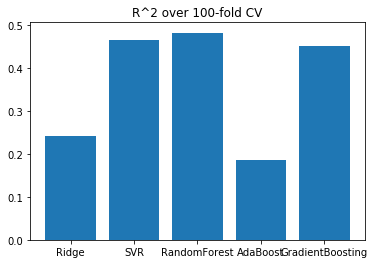

In [86]:
plt.bar([1, 2, 3, 4, 5],[np.mean(ridgeScores), np.mean(svrScores), np.mean(rfScores), np.mean(adaScores), np.mean(gradScores)])
plt.xticks([1, 2, 3, 4, 5], ['Ridge', 'SVR', 'RandomForest', 'AdaBoost', 'GradientBoosting'])
plt.title('R^2 over 100-fold CV')
plt.show()

# 20190430: Merging GCaMP7 and GCaMP6 libraries

In [88]:
gcamp6_lib

,Number of wells,Mutations added to GCaMP3,1 AP !F/F0,2 AP !F/F0,3 AP !F/F0,5 AP !F/F0,10 AP !F/F0,20 AP !F/F0,40 AP !F/F0,80 AP !F/F0,...,2 AP p-value,3 AP p-value,5 AP p-value,10 AP p-value,20 AP p-value,40 AP p-value,80 AP p-value,160 AP p-value,Decay half time (10 AP) p-value,F0 normalized to mCherry fluorescence p-value
OGB1,8,NaN,6.63,3.48,2.22,1.22,0.64,0.38,0.24,0.18,...,5.420000e-05,4.840000e-04,1.320000e-01,1.670000e-03,4.390000e-06,2.260000e-06,2.260000e-06,2.260000e-06,4.640000e-05,3.110000e-04
GCaMP3,322,base,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
GCaMP5G,55,T302L R303P D380Y,1.91,2.05,1.89,1.70,1.68,1.62,1.65,1.74,...,9.060000e-12,7.260000e-11,1.100000e-10,2.760000e-14,2.900000e-17,5.410000e-22,1.330000e-25,3.530000e-28,9.770000e-01,5.120000e-08
GCaMP6s,12,K78H T302L R303P D380Y T381R S383T R392G,15.39,20.75,16.19,11.81,8.88,5.99,5.14,3.79,...,1.790000e-08,1.970000e-08,1.790000e-08,1.790000e-08,1.790000e-08,1.790000e-08,1.790000e-08,1.790000e-08,3.950000e-06,4.150000e-03
GCaMP6m,17,T302L R303P M378G K379S D380Y T381R S383T R392G,13.27,12.20,9.52,7.41,5.49,4.36,3.52,2.59,...,1.730000e-09,1.980000e-09,1.150000e-09,1.110000e-09,1.040000e-09,1.040000e-09,1.040000e-09,1.040000e-09,1.730000e-09,4.110000e-05
GCaMP6f,16,T302L R303P A317E D380Y T381R S383T R392G,8.71,12.70,9.42,6.44,5.35,3.97,3.09,2.63,...,2.310000e-08,2.450000e-08,1.790000e-08,1.790000e-08,1.790000e-08,1.790000e-08,1.790000e-08,1.820000e-08,5.660000e-03,1.750000e-04
3,12,D380Y,1.89,1.89,1.91,1.92,1.89,1.75,1.63,1.47,...,4.030000e-03,1.770000e-03,4.580000e-04,2.170000e-05,1.070000e-05,4.410000e-06,6.910000e-06,8.550000e-03,6.350000e-01,3.500000e-01
29,17,T302L R303P D380Y,2.51,3.12,2.78,2.57,2.39,2.05,1.79,1.81,...,2.540000e-05,1.060000e-05,2.000000e-06,1.450000e-07,2.310000e-09,8.350000e-11,1.990000e-10,1.180000e-08,2.720000e-01,2.880000e-05
30,8,T302L R303P,5.06,2.85,3.21,1.59,1.32,1.10,1.05,0.93,...,8.700000e-02,1.450000e-01,2.280000e-01,1.700000e-01,2.610000e-01,5.530000e-01,7.070000e-01,8.480000e-01,2.430000e-01,1.180000e-04
31,12,L59H E60P T302L R303P,2.68,2.79,2.33,2.05,1.87,1.75,1.92,2.08,...,1.660000e-05,2.010000e-05,4.120000e-05,5.870000e-06,1.790000e-07,2.250000e-08,5.650000e-09,5.230000e-09,1.450000e-06,7.420000e-06


In [90]:
gcamp7_lib

,Number of wells,Mutations added to GCaMP6s,1 AP _F/F0,3 AP _F/F0,10 AP _F/F0,160 AP _F/F0,Decay half time (10 AP),1 AP p-value,3 AP p-value,10 AP p-value,160 AP p-value,Decay half time (10 AP) p-value
GCaMP6s variant,,,,,,,,,,,,
GCaMP3,213.0,H78K L302T P303R Y380D R381T T383S G392R,0.20,0.24,0.29,0.39,0.38,1.240000e-54,9.380000e-65,3.110000e-75,3.870000e-77,2.110000e-77
GCaMP5G,168.0,H78K R381T T383S G392R,0.37,0.39,0.46,0.62,0.38,1.180000e-36,4.760000e-40,2.510000e-52,2.620000e-51,8.830000e-68
GCaMP6s,641.0,NaN,1.00,1.00,1.00,1.00,1.00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
GCaMP6f,632.0,H78K A317E,0.67,0.73,0.73,0.58,0.20,2.440000e-07,1.240000e-05,2.130000e-09,3.510000e-57,1.720000e-85
10.699,7.0,H78K D304C R381T T383S G392R,0.02,0.00,0.03,0.17,0.07,5.780000e-06,5.780000e-06,5.780000e-06,6.560000e-06,5.780000e-06
10.700,6.0,H78K R303F P303R R381T T383S G392R,0.59,0.72,0.66,0.59,0.31,1.140000e-03,8.420000e-03,2.150000e-03,7.040000e-05,2.630000e-05
10.701,7.0,H78K R303M P303R R381T T383S G392R,0.06,0.13,0.19,0.38,0.32,7.800000e-06,3.240000e-05,1.470000e-05,8.300000e-06,5.780000e-06
G-GECO1.0,7.0,H78K K118I L172Q L302T P303R Y380D R381T T383S...,0.45,0.29,0.28,0.59,0.35,1.630000e-04,8.050000e-06,7.320000e-06,6.290000e-05,5.780000e-06
G-GECO1.1,7.0,K68E H78K K118I L172Q L302T P303R K379N Y380D ...,0.18,0.22,0.17,0.40,0.49,6.660000e-06,5.780000e-06,5.970000e-06,8.840000e-06,5.780000e-06


In [92]:
mutsInBoth = [
    'GCaMP3',
    'GCaMP5G',
    'GCaMP6s',
    'GCaMP6f'
]
gcamp6_lib.loc[mutsInBoth, '160 AP !F/F0']

GCaMP3     1.00
GCaMP5G    1.76
GCaMP6s    2.99
GCaMP6f    2.33
Name: 160 AP !F/F0, dtype: float64

In [94]:
gcamp7_lib.loc[mutsInBoth, '160 AP _F/F0']

GCaMP6s variant
GCaMP3     0.39
GCaMP5G    0.62
GCaMP6s    1.00
GCaMP6f    0.58
Name: 160 AP _F/F0, dtype: float64

In [96]:
list(set(gcamp6_lib.index.tolist()) & set(gcamp7_lib.index.tolist()))

['GCaMP3', 'GCaMP6s', 'GCaMP5G', 'GCaMP6f']

In [119]:
# Merge libraries
mutsInBoth = list(set(gcamp6_lib.index.tolist()) & set(gcamp7_lib.index.tolist()))
gcamp67Lib = gcamp6_lib.copy().drop(list(set(gcamp6_lib.index.tolist()) & set(gcamp7_lib.index.tolist())))
gcamp67Lib.drop('OGB1', inplace = True)
gcamp67Lib.rename({'160 AP !F/F0' : '160 AP _F/F0'}, axis = 1, inplace = True)
gcamp67Lib = gcamp67Lib['160 AP _F/F0'] * 0.39
gcamp67Lib = pd.concat([gcamp67Lib, gcamp7_lib['160 AP _F/F0']])
gcamp67Lib

GCaMP6m    0.8151
3          0.5226
29         0.7527
30         0.3627
31         0.8580
54         0.4134
61         0.3939
65         0.3705
67         0.1716
68         0.1950
69         0.7254
74         0.4017
75         0.3822
76         0.3510
77         0.2418
78         0.3666
80         0.3861
81         0.2496
82         0.4095
83         0.5304
84         0.4719
85         0.4095
86         0.2925
87         0.4641
88         0.2574
89         0.3120
90         0.4017
91         0.3471
92         0.3081
93         0.1170
            ...  
10.1583    0.4600
10.1584    0.3100
10.1585    0.5600
10.1586    0.3200
10.1587    0.7200
10.1588    0.5200
10.1589    0.6900
10.1590    0.7200
10.1591    0.3000
10.1592    0.0800
10.1593    0.3300
10.1594    0.4400
10.1595    0.4700
10.1596    0.9700
10.1597    0.6700
10.1598    0.5400
10.1599    0.5100
10.1600    0.2800
10.1601    1.2300
10.1602    0.4600
10.1603    0.1900
10.1604    0.5600
10.1605    0.3200
10.1606    0.3100
10.1607   

In [166]:
# Load in variant z-score DFs
z6 = pd.read_csv('./varZScore3.csv', index_col = 0).drop(mutsInBoth)
z7 = pd.read_csv('./varZScore3_gcamp7.csv', index_col = 0)
zBoth = pd.concat([z6,z7])
colsToDrop = zBoth.nunique()[zBoth.nunique() == 1].index     # Drop all positions in the library that do not mutate
zBoth = zBoth.drop(colsToDrop, axis = 1)

In [167]:
# Split data into test, training, and validation set
from sklearn.model_selection import train_test_split
x = zBoth
y = gcamp67Lib
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1)

# Reassign x and y to 90% split of data
x = x_train
y = y_train
# x_test.to_csv('./gcamp6s_validation_x.csv')
# y_test.to_csv('./gcamp6s_validation_y.csv')

In [196]:
# Test different models (SVR, RF, GradientBoosting)

# Import models and ShuffleSplit
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import ShuffleSplit
splits = 10       # Number of CV splits
ss = ShuffleSplit(n_splits = splits, test_size = 0.2)
ss.get_n_splits(x_train)

# List of models to train
models = [
    SVR(),
    RandomForestRegressor(),
    GradientBoostingRegressor(),
]

# Empty list for scores of each model for each fold of CV
scores = [[] for model in models]

# Empty list for a sample of predicted and true y-values
yPreds = []
yTests = []

i = 0
for model in models:
    for train_index, test_index in ss.split(x):
        
        # Split into training and test sets using ShuffleSplit
        x_train = x.iloc[train_index]
        y_train = y.iloc[train_index]
        
        x_test = x.iloc[test_index]
        y_test = y.iloc[test_index]
        
        # Fit model, predict fluorescence for test set, record model score
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        scores[i].append(model.score(x_test, y_test))
        
    i += 1
    
    # Record last set of predicted and test values for respective model
    yPreds.append(y_pred)
    yTests.append(y_test)

In [205]:
str(models[2]).split('(')[0]

'GradientBoostingRegressor'

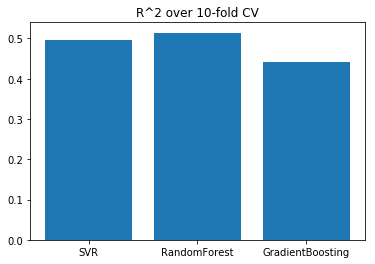

In [197]:
# Plot average score for each model
modelNames = [
    'SVR',
    'RandomForest',
    'GradientBoosting'
]
scoreAve = np.mean(scores, axis = 1)
tickLoc = range(1, len(models) + 1)

plt.bar(tickLoc, scoreAve)
plt.xticks(tickLoc, modelNames)
plt.title('R^2 over 10-fold CV')
plt.show()

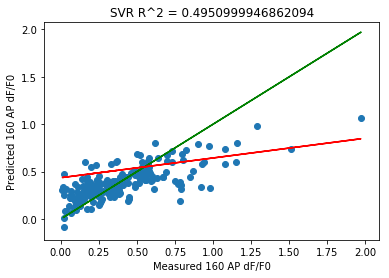

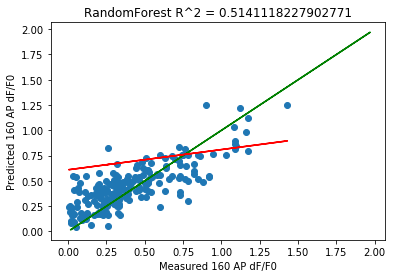

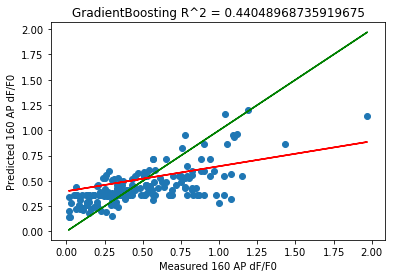

In [198]:
# Plot performance of each model
"""
Generate plots of predicted values~expected values. The points are colored by 
their residual to the 1:1 line. The green line is the line for a perfect model
and the red line is the line of best fit for the model.
"""
for idx in range(0, len(models)):
    resid = yPreds[idx] - yTests[idx]
    plt.plot(y_test, y_test, 'g')                   # 1:1 line for perfect model (green)

    b, m = np.polyfit(yTests[idx], yPreds[idx], 1)
    plt.plot(yTests[idx], b + m * yTests[idx], 'r') # Line of best fit for predicted~measured (red)

    plt.scatter(yTests[idx], yPreds[idx])
    plt.xlabel('Measured 160 AP dF/F0')
    plt.ylabel('Predicted 160 AP dF/F0')
    plt.title(modelNames[idx] + ' R^2 = ' + str(scoreAve[idx]))
    plt.show()

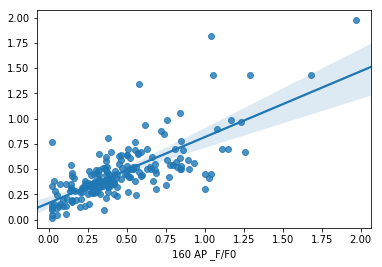

In [187]:
sns.regplot(yTests[1], yPreds[1])